In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Reading in all the trade and market data for round 1

In [5]:
price_day_m1 = pd.read_csv('data/prices_round_1_day_-1.csv', sep = ';')
price_day_m2 = pd.read_csv('data/prices_round_1_day_-2.csv', sep = ';')
price_day_0 = pd.read_csv('data/prices_round_1_day_0.csv', sep = ';')
trades_day_m1 = pd.read_csv('data/trades_round_1_day_-1.csv', sep = ';')
trades_day_m2 = pd.read_csv('data/trades_round_1_day_-2.csv', sep = ';')
trades_day_0 = pd.read_csv('data/trades_round_1_day_0.csv', sep = ';')
print(trades_day_0)

# Store all trades and price dataframes in a list
prices = [price_day_0, price_day_m1, price_day_m2]
trades = [trades_day_0, trades_day_m1, trades_day_m2]

      timestamp  buyer  seller            symbol   currency    price  quantity
0           100    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0         1
1           300    NaN     NaN              KELP  SEASHELLS   2029.0         6
2           300    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9998.0         2
3           300    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9998.0         1
4           300    NaN     NaN         SQUID_INK  SEASHELLS   1965.0         6
...         ...    ...     ...               ...        ...      ...       ...
8177     999500    NaN     NaN              KELP  SEASHELLS   2032.0         2
8178     999500    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9995.0         2
8179     999500    NaN     NaN         SQUID_INK  SEASHELLS   1830.0         2
8180     999600    NaN     NaN              KELP  SEASHELLS   2032.0         1
8181     999600    NaN     NaN         SQUID_INK  SEASHELLS   1832.0         1

[8182 rows x 7 columns]


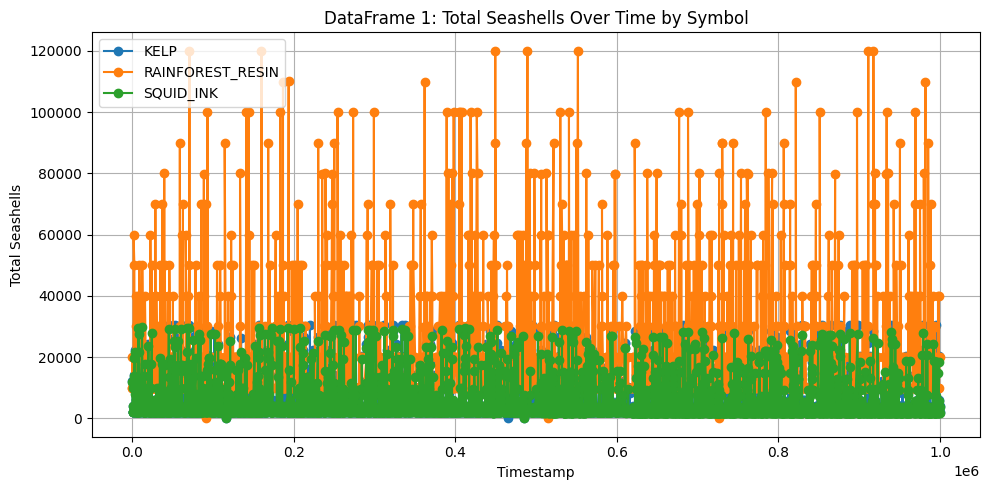

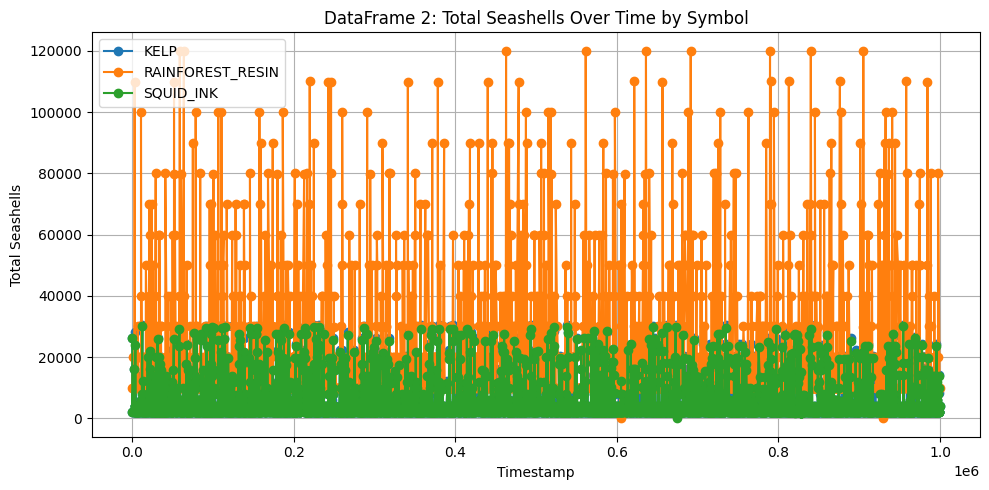

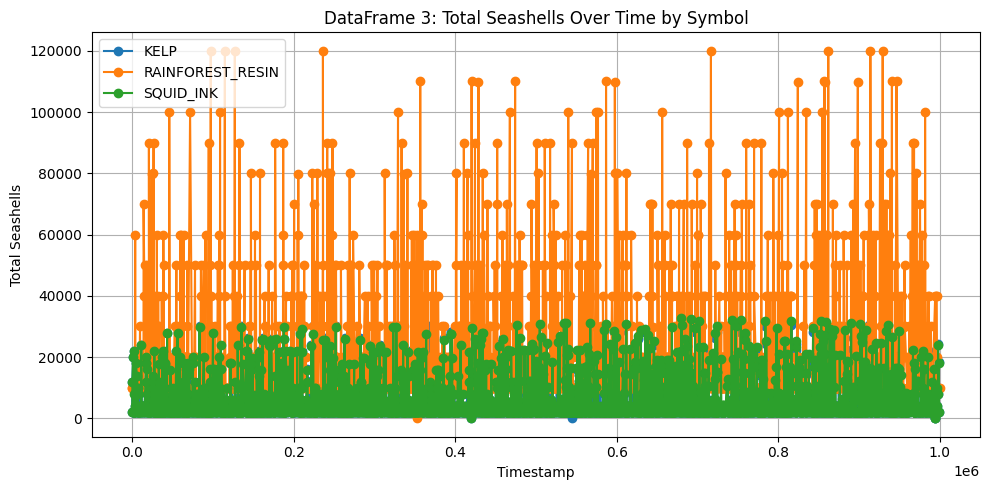

In [10]:
# Merge price and quantity and visualse for trades
for df in trades:
    df['total_seashells'] = df['quantity'] * df['price']

# visualise the total seashells across timestamp for resin, kelp and ink

for idx, df in enumerate(trades, start=1):
    plt.figure(figsize=(10, 5))  # Create a new figure for each DataFrame
    
    # Group the DataFrame by 'symbol'
    grouped = df.groupby('symbol')
    
    # Iterate over each group (symbol)
    for symbol, group in grouped:
        # It's a good idea to sort by timestamp if the data isn't already sorted
        group_sorted = group.sort_values(by='timestamp')
        plt.plot(group_sorted['timestamp'], group_sorted['total_seashells'],
                 marker='o', label=symbol)
    
    # Labeling the axes and the plot
    plt.xlabel('Timestamp')
    plt.ylabel('Total Seashells')
    plt.title(f'DataFrame {idx}: Total Seashells Over Time by Symbol')
    plt.legend()
    plt.grid(True)  # Optional, to add a grid for easier reading
    plt.tight_layout()
    plt.show()